In [4]:
#!gdown 10ZdMFvfhGeXAa8xR0J00kHIHp9y9m9uL --output ../data/gmmMarketDataset.csv

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

plt.style.use('dark_background')
mpl.rcParams['axes.prop_cycle'] = plt.cycler(color=['blue'])

**Q. What is meant by customer segmentation?**

- Customer segmentation is the process by which you divide your customers up based on common characteristics – such as demographics or behaviours, so you can market to those customers more effectively.

- Almost all the companies in today's world, one way or other, make use of customer segmentation for marketing.


Before jumping in, let's first understand and import the data, and try to visualize it on a plot.

#### **Dataset - Wholesale Customers Data**

The dataset used for this case study contains the following parameters:

1. **Fresh:** annual spending (some monetary unit) on fresh products (Continuous);
2. **Milk:** annual spending (some monetary unit) on milk products (Continuous);
3. **Grocery:** annual spending (some monetary unit) on grocery products (Continuous);
4. **Frozen:** annual spending (some m.u.) on frozen products (Continuous)
5. **Detergentss_Paper:** annual spending (some m.u.) on detergents and paper products (Continuous)
6. **Delicassen:** annual spending (some m.u.) on and delicatessen products (Continuous);
7. **Channel:** customers Channel - (Two possible values: Horeca (Hotel/Restaurant/Cafe) or Retail channel) (Nominal)
8. **Region:** customers Region (Three possible values: Lisnon, Oporto or Other) (Nominal)


In [10]:
df = pd.read_csv('../data/gmmMarketDataset.csv')
df.columns = [col.lower() for col in df.columns]
df.head()

,channel,region,fresh,milk,grocery,frozen,detergents_paper,delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


- The dataset consists of 440 customers and has 8 attributes for each of these customers.

- No missing values

- Only two variables are **non-continuous (categorical)** in nature: Channel and Region.

- So for easing our computations, we will drop these two categorical features.


In [14]:
# drop channel and Region column as they are categorical.
df.drop(['channel' , 'region'] , axis = 1 , inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   fresh             440 non-null    int64
 1   milk              440 non-null    int64
 2   grocery           440 non-null    int64
 3   frozen            440 non-null    int64
 4   detergents_paper  440 non-null    int64
 5   delicassen        440 non-null    int64
dtypes: int64(6)
memory usage: 20.8 KB


In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x = scaler.fit_transform(df.to_numpy())
x.shape

(440, 6)

Text(0.5, 1.0, 'Gaussian Mixture Model')

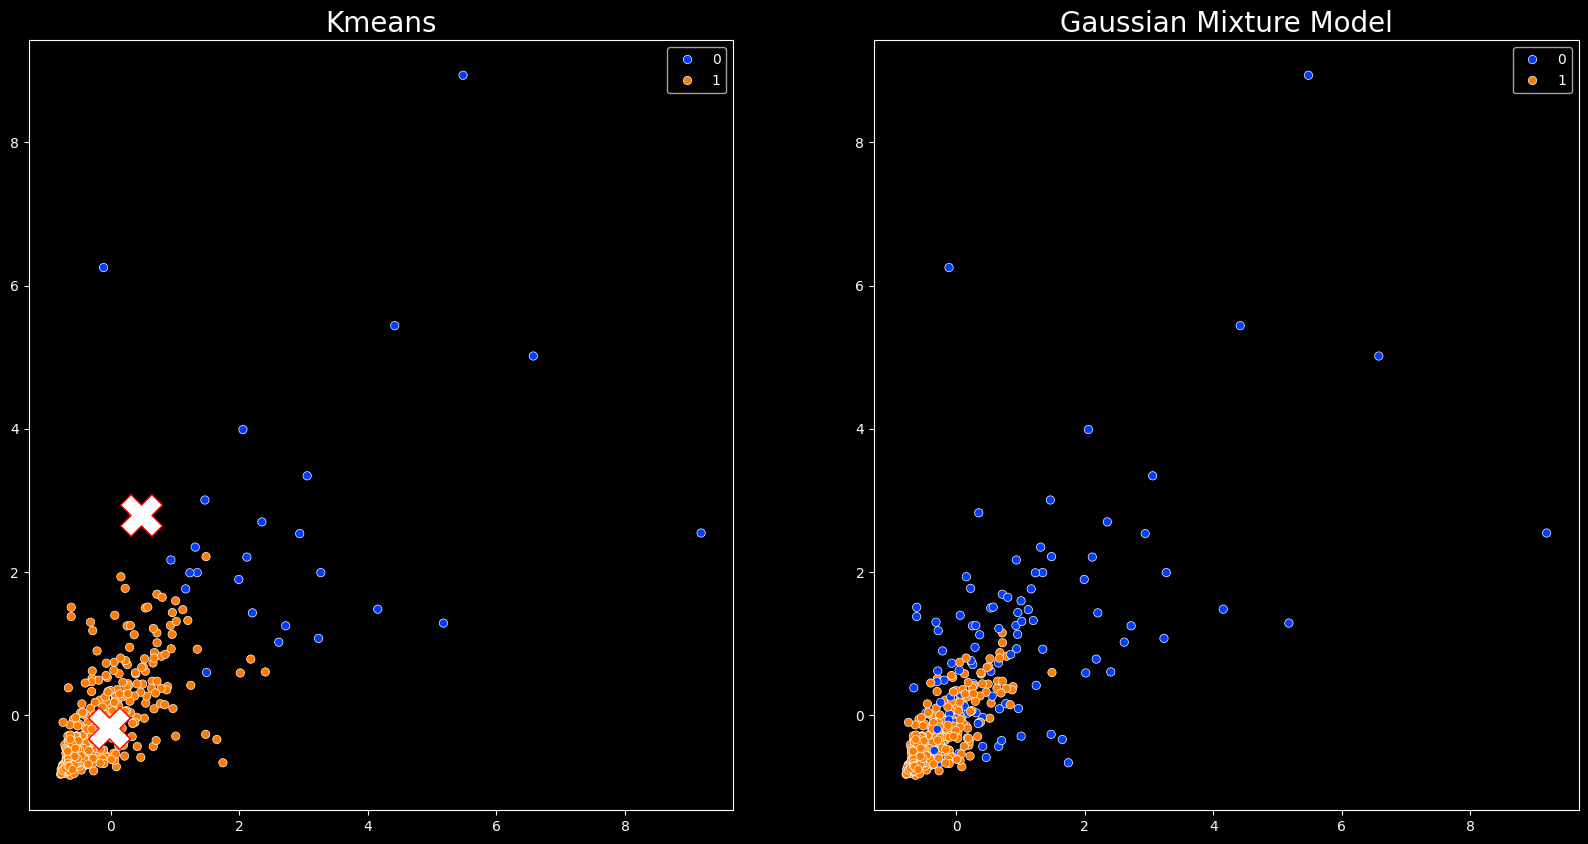

In [56]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components= 2)
gmm.fit(x)
glabels = gmm.predict(x)


kmeans = KMeans(n_clusters= 2)
kmeans.fit(x)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

plt.figure(figsize = (20 , 10))
plt.subplot(1 , 2, 1)
sns.scatterplot(x = x[: , 1] , y = x[: , 2] , hue = labels , palette = 'bright')
plt.scatter(centroids[: , 0] , centroids[: , 1] , c = 'white' , s = 900, edgecolors = 'red' , marker = 'X')
plt.title('Kmeans' , fontsize = 20)

plt.subplot(1 , 2, 2)
sns.scatterplot(x = x[: , 1] , y = x[: , 2] , hue = glabels , palette = 'bright')
plt.title('Gaussian Mixture Model' , fontsize = 20)

## 📊 Key Observations from the Graph:

### Cluster Boundaries:

- KMeans assumes clusters are spherical and equally sized, leading to hard boundaries between clusters.

- GMM, on the other hand, is probabilistic and flexible—it assigns points based on likelihood, which results in softer, more natural-looking boundaries.

### Outlier Handling:

- KMeans tends to pull centroids toward outliers, often distorting the cluster shape.

- GMM is better at ignoring scattered noise, as it calculates probability densities, not just Euclidean distances.

### Density Awareness:

- GMM effectively handles varying densities within the dataset, something KMeans struggles with.

- In the right subplot (GMM), cluster allocation better reflects natural groupings in dense vs. sparse regions.

### Flexibility in Shape:

- KMeans fails when clusters are not strictly circular or linearly separable.

- GMM can model elliptical clusters, thanks to its underlying Gaussian assumptions.

### Visual Separation:

- The left plot (KMeans) shows misclassified points around boundaries.

- The right plot (GMM) has better grouping, especially in overlapping regions.
